In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading & Understanding the DATA

In [65]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
df.shape

(730, 16)

In [67]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [69]:
# drop index
df.drop(["instant"], axis=1, inplace=True)

In [70]:
num_cols = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")]
cat_cols = df.dtypes[df.dtypes == "object"]


In [71]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [72]:
num_cols = [ 'temp', 'atemp', 'hum', 'windspeed']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

## EDA

### Numeric features

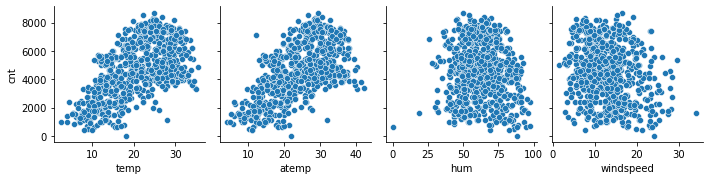

In [73]:
sns.pairplot(data=df, y_vars=["cnt"], x_vars=num_cols)
plt.show()

### Categorical features

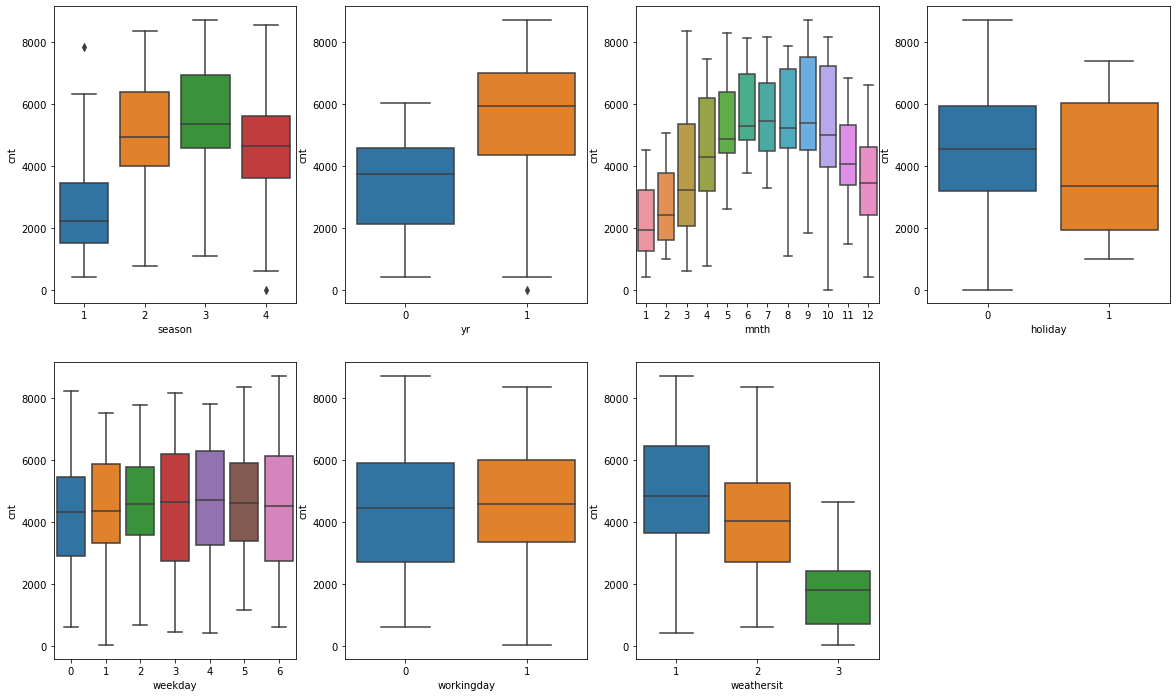

In [74]:
plt.figure(figsize=(20, 12))

for i in range(0,len(cat_cols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x = cat_cols[i], y = 'cnt', data = df)
plt.show()

## Data preparation

#### Data quality checks, if any, are performed, and all data quality issues are addressed in the right way. Explanations for data quality issues are clearly mentioned in comments.

In [75]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Categorical variables are handled appropriately.

##### Date is a categorical variable here, we can extract date info like dayoftheMonth and then delete the feature

In [76]:
df.drop(["dteday"], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dummy variables are created properly wherever applicable.

weathersit & season

##### lets try to represent season with 2 dummy variables

- 00 -> spring
- 01 -> summer
- 10 -> fall
- 11 -> winter

This means,
- season_v1 = 0 if 1/2, else 1
- season_v2 = 0 if 1/3, else 1

In [77]:
"""
df["season_v1"] = df["season"].apply(lambda x: 0 if x in [1,2] else 1)
df["season_v2"] = df["season"].apply(lambda x: 0 if x in [1,3] else 1)

# Check the encoding
print(df[df["season"] == 1][["season", "season_v1", "season_v2"]].head())
print(df[df["season"] == 2][["season", "season_v1", "season_v2"]].head())
print(df[df["season"] == 3][["season", "season_v1", "season_v2"]].head())
print(df[df["season"] == 4][["season", "season_v1", "season_v2"]].head())

"""

'\ndf["season_v1"] = df["season"].apply(lambda x: 0 if x in [1,2] else 1)\ndf["season_v2"] = df["season"].apply(lambda x: 0 if x in [1,3] else 1)\n\n# Check the encoding\nprint(df[df["season"] == 1][["season", "season_v1", "season_v2"]].head())\nprint(df[df["season"] == 2][["season", "season_v1", "season_v2"]].head())\nprint(df[df["season"] == 3][["season", "season_v1", "season_v2"]].head())\nprint(df[df["season"] == 4][["season", "season_v1", "season_v2"]].head())\n\n'

In [78]:
df_dummies = pd.get_dummies(df["season"], drop_first=True, prefix="season")
df = pd.concat([df, df_dummies], axis=1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [79]:
df_dummies = pd.get_dummies(df["weathersit"], drop_first=True, prefix="weathersit")
df = pd.concat([df, df_dummies], axis=1)

df.drop(["season", "weathersit"], axis=1, inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


#### New metrics are derived if applicable and are used for analysis and modelling.

In [80]:
# derive date metrics

In [81]:
# also, do we need casual and registered features? 
# these are also demands that needs to be predicted

df.drop(["casual", "registered"], axis=1, inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


#### The data is converted to a clean format suitable for analysis.

## Data split - train and test sets

In [82]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [83]:
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


#### Scale the numeric features

In [84]:
scaler = MinMaxScaler()

df_train[num_cols+['cnt']] = scaler.fit_transform(df_train[num_cols+['cnt']])

In [85]:
df_train[num_cols+ ['cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


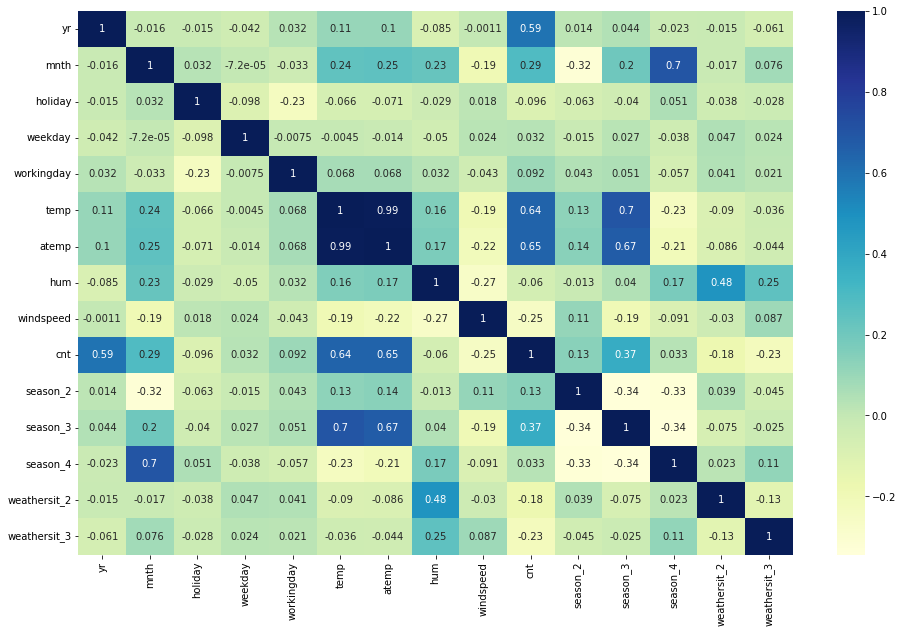

In [86]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

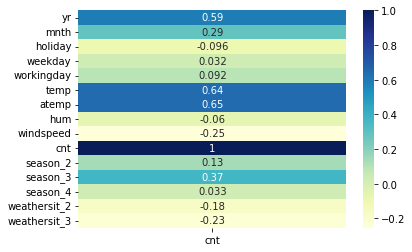

In [87]:
#plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr()[['cnt']], annot = True, cmap="YlGnBu")
plt.show()

In [88]:
# good correlation with atemp, temp, yr

In [89]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Bottom-up approach

#### Top-down approach

## RFE with Linear Model

In [90]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [91]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [92]:
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [94]:
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [95]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp'], dtype='object')

In [96]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [97]:
# Adding a constant variable 
import statsmodels.api as sm 
 
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1560.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                        0.00
Time:                        02:00:50   Log-Likelihood:                          456.91
No. Observations:                 510   AIC:                                     -893.8
Df Residuals:                     500   BIC:                                     -851.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr               0.2430      0.009     27.544      0.000       0.226       0.260
holiday         -0.0791      0.028     -2.806      0.005      -0.134      -0.024
temp             0.5426      0.036     15.032      0.000       0.472       0.613
hum              0.1004      0.026      3.910      0.000       0.050       0.151
windspeed       -0.0614      0.023     -2.647      0.008      -0.107      -0.016
season_2         0.1145      0.016      7.003      0.000       0.082       0.147
season_3         0.0674      0.022      3.075      0.002       0.024       0.111
season_4         0.1660      0.014     11.896      0.000       0.139       0.193
weathersit_2    -0.0814      0.011     -7.399      0.000      -0.103      -0.060
weathersit_3    -0.3039      0.028    -10.914      0.000      -0.359      -0.249
==============================================================================
Omnibus:                       74.496   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.586
Skew:                          -0.764   Prob(JB):                     4.52e-39
Kurtosis:                       5.445   Cond. No.                         12.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables have a small p-value and hence are all significant

VIF

In [98]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.67
3,hum,15.02
6,season_3,6.48
4,windspeed,3.63
5,season_2,3.36
7,season_4,2.48
8,weathersit_2,2.13
0,yr,2.02
9,weathersit_3,1.17
1,holiday,1.04


temp has a very high VIF, lets drop that first, and Repeat RFE & VIF

In [99]:
X_train_new = X_train_rfe.drop(['temp'], axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1179.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                        0.00
Time:                        02:00:50   Log-Likelihood:                          361.82
No. Observations:                 510   AIC:                                     -705.6
Df Residuals:                     501   BIC:                                     -667.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr               0.2656      0.010     25.379      0.000       0.245       0.286
holiday         -0.0837      0.034     -2.468      0.014      -0.150      -0.017
hum              0.3375      0.024     13.827      0.000       0.290       0.385
windspeed       -0.0110      0.028     -0.400      0.689      -0.065       0.043
season_2         0.2689      0.015     17.562      0.000       0.239       0.299
season_3         0.3349      0.015     21.692      0.000       0.305       0.365
season_4         0.2396      0.016     15.228      0.000       0.209       0.270
weathersit_2    -0.1281      0.013    -10.089      0.000      -0.153      -0.103
weathersit_3    -0.3818      0.033    -11.594      0.000      -0.447      -0.317
==============================================================================
Omnibus:                       36.376   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.770
Skew:                          -0.362   Prob(JB):                     8.73e-20
Kurtosis:                       4.899   Cond. No.                         7.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Windspeed now has a high VIF, lets eliminate that

In [100]:
X_train_new = X_train_rfe.drop(['windspeed','temp'], axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1328.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                        0.00
Time:                        02:00:51   Log-Likelihood:                          361.74
No. Observations:                 510   AIC:                                     -707.5
Df Residuals:                     502   BIC:                                     -673.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr               0.2649      0.010     25.615      0.000       0.245       0.285
holiday         -0.0844      0.034     -2.492      0.013      -0.151      -0.018
hum              0.3324      0.021     15.962      0.000       0.291       0.373
season_2         0.2685      0.015     17.602      0.000       0.238       0.298
season_3         0.3355      0.015     21.859      0.000       0.305       0.366
season_4         0.2400      0.016     15.302      0.000       0.209       0.271
weathersit_2    -0.1276      0.013    -10.112      0.000      -0.152      -0.103
weathersit_3    -0.3820      0.033    -11.611      0.000      -0.447      -0.317
==============================================================================
Omnibus:                       36.840   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.336
Skew:                          -0.366   Prob(JB):                     3.99e-20
Kurtosis:                       4.915   Cond. No.                         7.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,6.82
4,season_3,2.19
5,season_4,2.17
3,season_2,2.02
6,weathersit_2,1.94
0,yr,1.92
7,weathersit_3,1.13
1,holiday,1.04


VIF of temp is still high, lets eliminate that

In [102]:
X_train_new = X_train_rfe.drop(['hum', 'windspeed', 'temp'], axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.29e-142
Time:                        02:00:51   Log-Likelihood:                 381.92
No. Observations:                 510   AIC:                            -747.8
Df Residuals:                     502   BIC:                            -714.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2183      0.012     17.807      0.000       0.194       0.242
yr               0.2461      0.010     24.009      0.000       0.226       0.266
holiday         -0.0960      0.033     -2.944      0.003      -0.160      -0.032
season_2         0.2580      0.015     17.591      0.000       0.229       0.287
season_3         0.3334      0.014     23.097      0.000       0.305       0.362
season_4         0.2420      0.015     16.533      0.000       0.213       0.271
weathersit_2    -0.0852      0.011     -7.818      0.000      -0.107      -0.064
weathersit_3    -0.3089      0.031    -10.040      0.000      -0.369      -0.248
==============================================================================
Omnibus:                       33.619   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.901
Skew:                          -0.329   Prob(JB):                     2.71e-18
Kurtosis:                       4.837   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.70
5,weathersit_2,1.39
4,season_4,1.35
2,season_2,1.32
3,season_3,1.32
6,weathersit_3,1.05
1,holiday,1.02


#### Residual analysis

In [104]:
y_pred = lm.predict(X_train_lm)

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

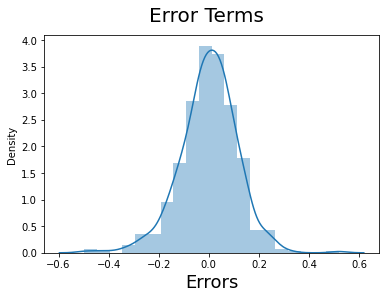

In [105]:
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

### Predictions

#### Scaling test features

In [106]:
df_test[num_cols+['cnt']] = scaler.transform(df_test[num_cols+['cnt']])

y_test = df_test.pop('cnt')
X_test = df_test

In [107]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0, 0.5, 'y_pred')

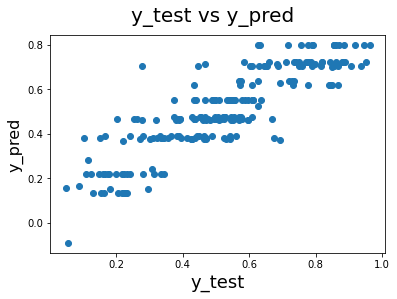

In [108]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [109]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.739971814547455

## Sklearn model, with same featueres

In [110]:
sklearn_lm = LinearRegression()

sklearn_lm.fit(X_train_new, y_train)

LinearRegression()

In [113]:
X_test_new = X_test[X_train_new.columns]
y_pred = sklearn_lm.predict(X_test_new)

In [114]:
r2_score(y_test, y_pred)

0.7399718145474539

In [115]:
sklearn_lm.coef_

array([ 0.24613914, -0.09595149,  0.25796475,  0.33339965,  0.2419623 ,
       -0.0851674 , -0.30891184])

In [117]:
lm.params

const           0.218296
yr              0.246139
holiday        -0.095951
season_2        0.257965
season_3        0.333400
season_4        0.241962
weathersit_2   -0.085167
weathersit_3   -0.308912
dtype: float64